<a href="https://colab.research.google.com/github/Rohita-G/rohita-gangishetty-700750412/blob/main/icp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
path_to_csv = '/content/gdrive/My Drive/diabetes.csv'

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

dataset = np.random.rand(100, 8)
target = np.random.randint(2, size=100)

X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size=0.25, random_state=87)

# Create a Sequential model
my_nn = Sequential()

# Add input layer and the first hidden layer
my_nn.add(Dense(20, input_dim=8, activation='relu'))

# Add additional Dense layers
my_nn.add(Dense(32, activation='relu'))
my_nn.add(Dense(64, activation='relu'))
my_nn.add(Dense(32, activation='relu'))

# Add the output layer
my_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
my_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

# Print model summary and evaluate on the test data
print(my_nn.summary())
print(my_nn.evaluate(X_test, Y_test))


Epoch 1/100
3/3 [==============================] - 2s 8ms/step - loss: 0.7002 - accuracy: 0.4933
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6963 - accuracy: 0.4933
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4933
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.4933
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.4933
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.4933
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.4933
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5600
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.6667
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6833 - accuracy: 0.6667
Epoch 11/100
3/3 [===========

In [13]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 0.2932 - accuracy: 0.9102 - val_loss: 0.2585 - val_accuracy: 0.9261
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0999 - accuracy: 0.9690 - val_loss: 0.1357 - val_accuracy: 0.9584
Epoch 3/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0892 - val_accuracy: 0.9719
Epoch 4/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0785 - val_accuracy: 0.9761
Epoch 5/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0833 - val_accuracy: 0.9748
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0672 - val_accuracy: 0.9787
Epoch 7/10
235/235 [==============================] - 8s 33ms/st

In [20]:
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])

# Process the data
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data /= 255.0
test_data /= 255.0

# Change the labels from integer to one-hot encoding.
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating a network with 3 hidden layers using 'tanh' activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 28ms/step - loss: 0.3419 - accuracy: 0.8967 - val_loss: 0.2382 - val_accuracy: 0.9246
Epoch 2/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1516 - accuracy: 0.9544 - val_loss: 0.1265 - val_accuracy: 0.9602
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1035 - accuracy: 0.9684 - val_loss: 0.1234 - val_accuracy: 0.9604
Epoch 4/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.1181 - val_accuracy: 0.9617
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.0924 - val_accuracy: 0.9702
Epoch 6/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0744 - val_accuracy: 0.9772
Epoch 7/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0778 - val_acc

In [21]:
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])

# Process the data
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Convert data to float (no scaling)
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# Change the labels from integer to one-hot encoding.
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating a network with 3 hidden layers using 'tanh' activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 27ms/step - loss: 0.3914 - accuracy: 0.8778 - val_loss: 0.2690 - val_accuracy: 0.9169
Epoch 2/10
235/235 [==============================] - 5s 23ms/step - loss: 0.2085 - accuracy: 0.9356 - val_loss: 0.1820 - val_accuracy: 0.9425
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1610 - accuracy: 0.9517 - val_loss: 0.1912 - val_accuracy: 0.9391
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1430 - accuracy: 0.9553 - val_loss: 0.2168 - val_accuracy: 0.9319
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1257 - accuracy: 0.9608 - val_loss: 0.1606 - val_accuracy: 0.9500
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1114 - accuracy: 0.9655 - val_loss: 0.1512 - val_accuracy: 0.9516
Epoch 7/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1021 - accuracy: 0.9678 - val_loss: 0.1125 - val_acc

1/1 [==============================] - 0s 382ms/step


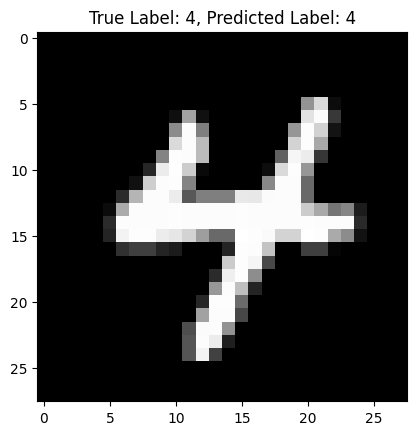

In [22]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0, len(test_data))
sample_image = test_data[index]
sample_label = test_labels[index]
sample_image = sample_image.reshape(1, -1)
predicted_probs = model.predict(sample_image)
predicted_class = np.argmax(predicted_probs)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {sample_label}, Predicted Label: {predicted_class}")
plt.show()